<!-- Project Overview -->

# <span style="color: #3498db;">2_5_8_Chatbot_development_Starter_Kit</span>

## <span style="color: #2ecc71;">Project Description</span>

The objective of this project is to develop a sequence-to-sequence (Seq2Seq) model for generating movie dialogues. This involves encoding dialogue text into a fixed-length vector using an LSTM-based encoder and then decoding this vector to generate coherent dialogue sequences. The project focuses on handling large volumes of dialogue data, tokenizing and padding sequences, and constructing a Seq2Seq model capable of producing meaningful dialogue responses.

## <span style="color: #e74c3c;">Data Loading and Initial Inspection</span>

1. **Loading the Dataset**:
   - The dataset is imported using `pandas`, which contains columns for dialogue ID, character ID, movie ID, character name, and the actual dialogue text. This step is crucial for preparing the data for further processing.

2. **Initial Data Exploration**:
   - Initial rows and a summary of the dataset are examined to understand the structure and quality of the data. This includes checking for non-null values and column data types.

3. **Handling Missing Values**:
   - Missing dialogue entries are addressed by replacing them with empty strings, ensuring that the dataset is complete and ready for processing.

4. **Visualization**:
   - A histogram with Kernel Density Estimate (KDE) is plotted to visualize the distribution of text lengths, helping identify any anomalies or patterns in the data.

## <span style="color: #9b59b6;">Data Cleaning and Preprocessing</span>

1. **Text Cleaning**:
   - The dialogue text is cleaned to improve consistency and remove noise. This involves converting all text to lowercase and removing any extraneous whitespace.

2. **Updated Data Visualization**:
   - The distribution of text lengths is re-plotted after cleaning to ensure the preprocessing steps have addressed any previous inconsistencies.

## <span style="color: #f39c12;">Tokenization and Sequence Padding</span>

1. **Tokenization**:
   - The `Tokenizer` from TensorFlow is used to convert dialogue text into sequences of integers, with each integer representing a unique word or token. The vocabulary size is calculated to determine the range of token indices.

2. **Sequence Padding**:
   - Sequences are padded to a uniform length to ensure compatibility with the LSTM model. Padding is applied to the end of sequences to maintain their length consistency.

3. **Visualization of Sequence Lengths**:
   - The sequence lengths are visualized to confirm that padding has been applied correctly and that all sequences are now of uniform length.

## <span style="color: #1abc9c;">Model Architecture</span>

1. **Encoder**:
   - The encoder is designed with an embedding layer followed by an LSTM layer. The embedding layer converts tokens into dense vectors, while the LSTM processes these vectors to produce hidden states.

2. **Decoder**:
   - The decoder, consisting of an embedding layer and an LSTM, generates sequences based on the encoder's hidden states. A dense layer with softmax activation produces the final token predictions.

3. **Model Definition and Compilation**:
   - The Seq2Seq model is compiled using the RMSprop optimizer and categorical crossentropy loss function, setting the stage for training and optimization.

## <span style="color: #e67e22;">Training and Evaluation</span>

1. **Model Training**:
   - The model is trained with the processed input and target sequences. Training is monitored using a validation split to track performance and prevent overfitting.

2. **Loss Visualization**:
   - Training and validation loss are plotted to visualize the model's learning process and assess its performance over epochs.

## <span style="color: #2c3e50;">Inference Models and Testing</span>

1. **Inference Models**:
   - Separate models for encoding and decoding are used during inference to generate new dialogue sequences based on the input data.

2. **Decoding Function**:
   - A function is implemented to decode the generated sequences into human-readable text, allowing for the evaluation of the model's performance in generating coherent dialogues.

3. **Model Testing**:
   - The model is tested with sample inputs to generate and print dialogue sequences, providing a practical demonstration of its capabilities.

## <span style="color: #34495e;">Future Work and Improvements</span>

1. **Hyperparameter Tuning**:
   - Further experimentation with hyperparameters such as the number of LSTM units, batch size, and learning rate could enhance model performance.

2. **Handling Special Tokens**:
   - Proper management of special tokens like `startseq` and `endseq` is essential for improving the model's ability to generate accurate and complete sequences.

3. **Model Evaluation**:
   - Additional evaluation metrics, such as BLEU scores, could be used to better assess the quality of the generated text and compare it with human-generated dialogue.

4. **Model Persistence**:
   - Implementing functionality to save and load the trained model will facilitate future use and experimentation, allowing for easy deployment and further testing.

## <span style="color: #3498db;">Imports and Setup</span>

### <span style="color: #2ecc71;">Import Libraries</span>

- **`pandas`**: Essential for data manipulation and analysis. Provides data structures like DataFrames for handling datasets.
- **`numpy`**: Used for numerical operations and array manipulations, integral for handling data arrays.
- **`matplotlib.pyplot`**: A plotting library for creating visualizations such as histograms, scatter plots, and line graphs.
- **`seaborn`**: Builds on `matplotlib` for advanced statistical data visualization, making it easier to create informative plots.
- **`tensorflow`**: A comprehensive open-source framework for building and training machine learning models, including deep learning.
- **`keras`**: High-level API integrated with TensorFlow, simplifies the process of creating and training neural networks.

### <span style="color: #e74c3c;">Set Up GPU/CPU Environment</span>

- **GPU Acceleration**: Ensure GPU support is enabled if available, to speed up the training and evaluation of deep learning models.
- **CPU Configuration**: For environments without GPU, optimize code and training processes to ensure efficient CPU usage.

### <span style="color: #f39c12;">Configure TensorFlow Settings</span>

- **TensorFlow Settings**: Set configurations such as logging level, device placement, and memory growth options to optimize TensorFlow's performance.

In [ ]:
import pandas as pd  # Import pandas library for data manipulation

In [ ]:
import numpy as np  # Import numpy library for numerical operations

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer for text tokenization

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import pad_sequences for padding sequences


In [ ]:
from tensorflow.keras.models import Model  # Import Model class to build the Keras model

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense  # Import necessary layers for the model


In [ ]:
from tensorflow.keras.utils import to_categorical  # Import to_categorical for converting labels to one-hot encoding


In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [ ]:
import seaborn as sns  # Import seaborn for statistical data visualization

## <span style="color: #3498db;">Data Loading and Initial Inspection</span>

### <span style="color: #2ecc71;">1. Load the Dataset</span>

- **Dataset Path**: Define the path to the dataset file, ensuring it is correctly specified.
- **Data Loading**: Use `pandas` to read the dataset into a DataFrame, handling separators and column names as needed.

### <span style="color: #e74c3c;">2. Display Initial Dataset Information</span>

- **First Few Rows**: Use `.head()` to preview the first few rows of the dataset, providing an initial understanding of its structure and contents.
- **Dataset Summary**: Use `.info()` to obtain a summary of the dataset, including data types and non-null counts, to identify any missing values or anomalies.

### <span style="color: #9b59b6;">3. Summary Statistics for Text Column</span>

- **Text Column Analysis**: Use `.describe()` on the 'text' column to gather summary statistics such as count, unique values, and basic descriptive metrics, giving insights into the text data.

### <span style="color: #f39c12;">4. Ensure Data Quality</span>

- **Handle Missing Values**: Replace missing values in the 'text' column with empty strings or appropriate placeholders to ensure data integrity.
- **Data Type Conversion**: Ensure that all values in the 'text' column are of type string to avoid errors during processing.

### <span style="color: #1abc9c;">5. Plot Distribution of Text Lengths</span>

- **Calculate Text Lengths**: Create a new column to store the length of each text entry.
- **Visualization**: Use `seaborn` to plot the distribution of text lengths, providing insights into the variability and typical length of dialogues in the dataset.

In [ ]:
# Load the dataset

In [ ]:
dataset_path = 'movie_lines.tsv'  # Update with the correct path if necessary

In [ ]:
lines = pd.read_csv(dataset_path, sep='\t', on_bad_lines='skip', names=['lineID', 'characterID', 'movieID', 'character', 'text'])  # Load dataset with tab separator


In [ ]:
# Display initial dataset information

In [ ]:
print("First few rows of the dataset:")
print(lines.head())  # Print the first few rows of the dataset

First few rows of the dataset:
  lineID characterID movieID character          text
0  L1045          u0      m0    BIANCA  They do not!
1  L1044          u2      m0   CAMERON   They do to!
2   L985          u0      m0    BIANCA    I hope so.
3   L984          u2      m0   CAMERON     She okay?
4   L925          u0      m0    BIANCA     Let's go.


In [ ]:
print("\nDataset info:")
print(lines.info())  # Print dataset summary including column types and non-null counts


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293202 entries, 0 to 293201
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   lineID       293202 non-null  object
 1   characterID  288917 non-null  object
 2   movieID      288917 non-null  object
 3   character    288874 non-null  object
 4   text         288663 non-null  object
dtypes: object(5)
memory usage: 11.2+ MB
None


In [ ]:
# Summary statistics for 'text' column

In [ ]:
print("\nSummary statistics for 'text' column:")
print(lines['text'].describe())  # Print summary statistics for the 'text' column


Summary statistics for 'text' column:
count     288663
unique    251306
top        What?
freq        1610
Name: text, dtype: object


In [ ]:
# Ensure 'text' column is string and handle NaN values

In [ ]:
lines['text'] = lines['text'].fillna('')  # Replace NaNs with empty strings in 'text' column

In [ ]:
lines['text'] = lines['text'].astype(str)  # Ensure all values in 'text' column are strings

In [ ]:
# Plot distribution of text lengths

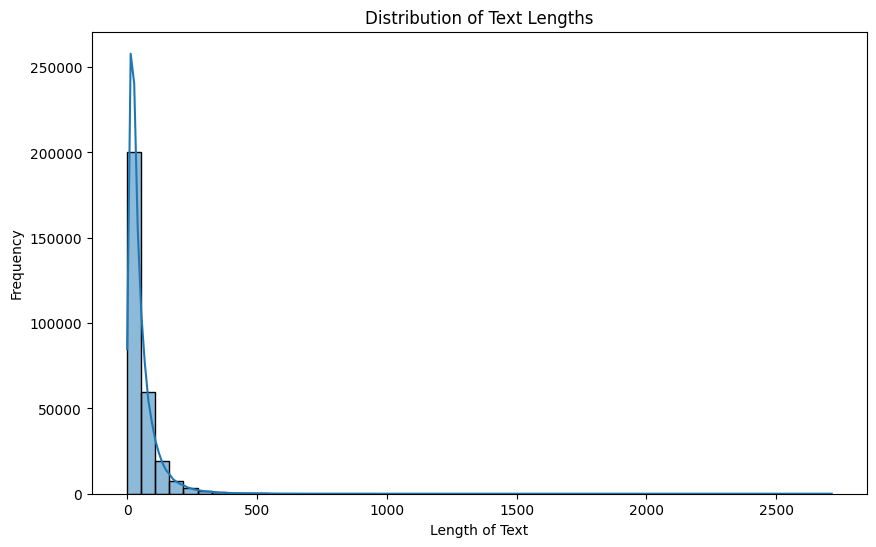

In [ ]:
lines['text_length'] = lines['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)  # Calculate text length
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.histplot(lines['text_length'], bins=50, kde=True)  # Plot distribution of text lengths with histogram and KDE
plt.title('Distribution of Text Lengths')  # Set the title of the plot
plt.xlabel('Length of Text')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Display the plot

In [ ]:
# Unique counts in columns

In [ ]:
print("\nUnique counts in columns:")  # Print a description for the following data
print(f"Unique characters: {lines['character'].nunique()}")  # Print unique character counts
print(f"Unique movies: {lines['movieID'].nunique()}")  # Print unique movie counts


Unique counts in columns:
Unique characters: 5214
Unique movies: 607


In [ ]:
# Plot counts of unique characters

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


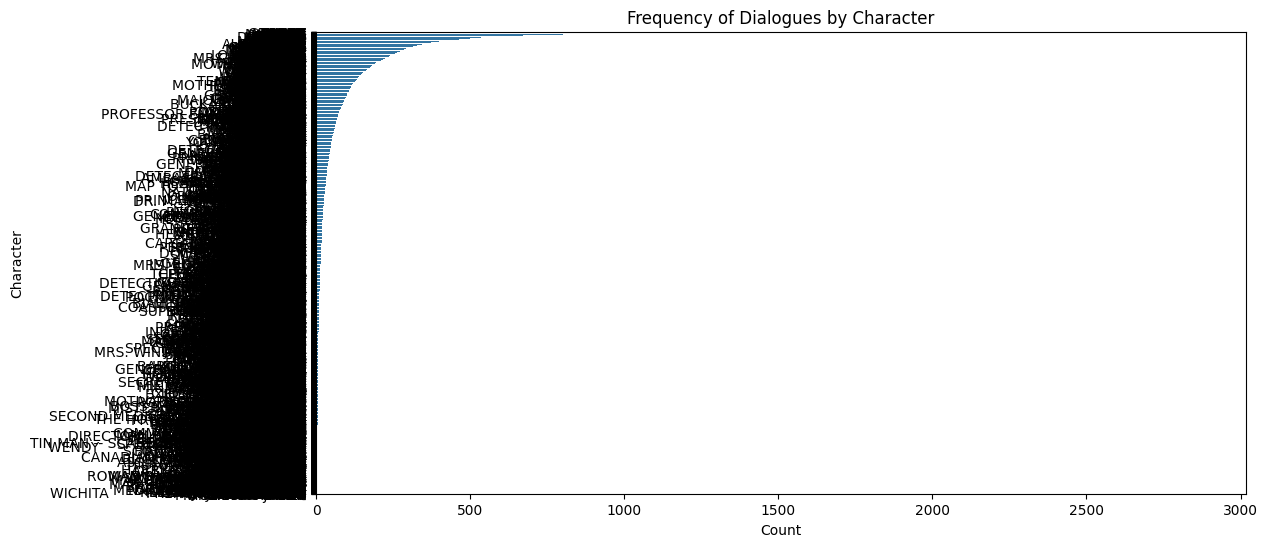

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.countplot(y='character', data=lines, order=lines['character'].value_counts().index)  # Plot frequency of dialogues by character
plt.title('Frequency of Dialogues by Character')  # Set the title of the plot
plt.xlabel('Count')  # Set the x-axis label
plt.ylabel('Character')  # Set the y-axis label
plt.show()  # Display the plot

In [ ]:
# Plot counts of unique movies

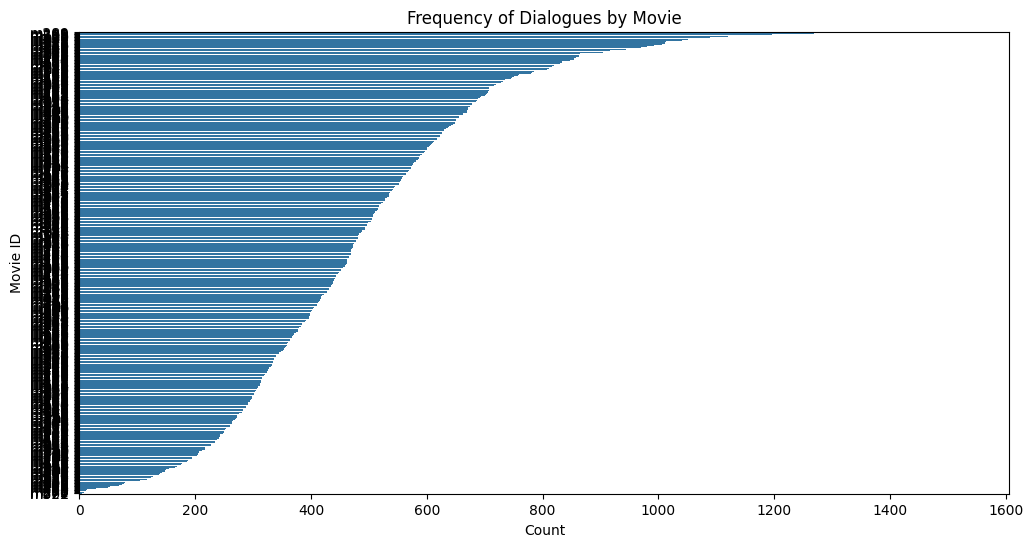

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.countplot(y='movieID', data=lines, order=lines['movieID'].value_counts().index)  # Plot frequency of dialogues by movie
plt.title('Frequency of Dialogues by Movie')  # Set the title of the plot
plt.xlabel('Count')  # Set the x-axis label
plt.ylabel('Movie ID')  # Set the y-axis label
plt.show()  # Display the plot

## <span style="color: #3498db;">Data Cleaning</span>

### <span style="color: #2ecc71;">1. Handle Missing Values</span>

- **Drop Missing Texts**: Remove rows where the 'text' column has missing values to ensure that all entries are valid for further processing.

### <span style="color: #e74c3c;">2. Clean and Normalize Text</span>

- **Text Normalization**: Convert all text entries to lowercase and strip leading/trailing spaces. This standardization helps in reducing inconsistencies and improves the performance of text analysis.

### <span style="color: #9b59b6;">3. Updated Data Inspection</span>

- **Recheck Data Information**: After cleaning, review the dataset info again using `.info()` to ensure all missing values are handled and the data types are correct.
- **Preview Cleaned Data**: Use `.head()` to display the first few rows of the cleaned dataset to verify that the cleaning operations were successful.

### <span style="color: #f39c12;">4. Plot Updated Distribution of Text Lengths</span>

- **Recalculate Text Lengths**: Update the column for text lengths after cleaning.
- **Visualization**: Plot the distribution of text lengths again to observe any changes in the data characteristics post-cleaning.

In [ ]:
# Handle missing values and clean the text

In [ ]:
lines = lines.dropna(subset=['text'])  # Drop rows where 'text' column has missing values

In [ ]:
lines['text'] = lines['text'].apply(lambda x: x.lower().strip())  # Convert text to lowercase and strip spaces


In [ ]:
# Show updated dataset info and first few rows

In [ ]:
print("\nUpdated Dataset info:")  # Print a description for the following data
print(lines.info())  # Print updated dataset info


Updated Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293202 entries, 0 to 293201
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   lineID       293202 non-null  object
 1   characterID  288917 non-null  object
 2   movieID      288917 non-null  object
 3   character    288874 non-null  object
 4   text         293202 non-null  object
 5   text_length  293202 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.4+ MB
None


In [ ]:
print("\nFirst few rows of the cleaned dataset:")  # Print a description for the following data
print(lines.head())  # Print first few rows of the cleaned dataset


First few rows of the cleaned dataset:
  lineID characterID movieID character          text  text_length
0  L1045          u0      m0    BIANCA  they do not!           12
1  L1044          u2      m0   CAMERON   they do to!           11
2   L985          u0      m0    BIANCA    i hope so.           10
3   L984          u2      m0   CAMERON     she okay?            9
4   L925          u0      m0    BIANCA     let's go.            9


In [ ]:
# Plot the updated distribution of text lengths

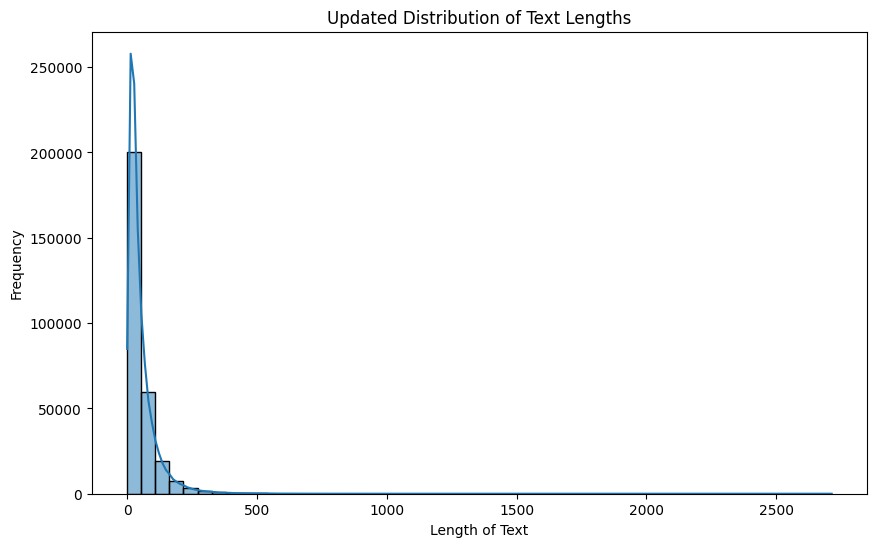

In [ ]:
lines['text_length'] = lines['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)  # Recalculate text length
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.histplot(lines['text_length'], bins=50, kde=True)  # Plot updated distribution of text lengths with histogram and KDE
plt.title('Updated Distribution of Text Lengths')  # Set the title of the plot
plt.xlabel('Length of Text')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Display the plot

## <span style="color: #3498db;">Selecting a Small Subset</span>

### <span style="color: #2ecc71;">1. Rationale</span>

- **Efficiency**: Working with a smaller subset of the dataset helps in speeding up the model training and evaluation processes, especially important when computing resources are limited.
- **Debugging**: Using a subset allows for quicker iteration and easier debugging of the code and model, helping identify and resolve issues more efficiently.

### <span style="color: #e74c3c;">2. Criteria for Selection</span>

- **Random Sampling**: Select a random sample of the data to ensure it is representative of the larger dataset, minimizing biases.
- **Balanced Distribution**: Ensure that the subset maintains the distribution of different classes or categories present in the full dataset.

### <span style="color: #f39c12;">3. Implementation Steps</span>

1. **Determine Sample Size**: Decide on the size of the subset based on computational constraints and project requirements.
2. **Sampling Method**: Use techniques such as random sampling or stratified sampling to select the subset.
3. **Data Extraction**: Extract the selected subset and save it as a separate file or variable for use in the analysis.

### <span style="color: #e67e22;">4. Benefits</span>

- **Faster Execution**: Reduces the time required for model training and evaluation, allowing for more rapid experimentation.
- **Resource Management**: Helps in managing computational resources more effectively, particularly in environments with limited hardware capabilities.

### <span style="color: #16a085;">5. Example</span>

- **Subset Size**: For example, if working with a dataset of 100,000 samples, selecting a subset of 10,000 samples can be a manageable size for initial testing and development.
- **Process**:
  - Load the full dataset.
  - Randomly sample a specified number of rows.
  - Save the subset for use in the project.

In [ ]:
# Load a smaller subset of the dataset

In [ ]:
subset_size = 1000  # Reduce the size for testing

In [ ]:
lines = pd.read_csv(dataset_path, sep='\t', nrows=subset_size, on_bad_lines='skip', names=['lineID', 'characterID', 'movieID', 'character', 'text'])  # Load a smaller subset


In [ ]:
# Handle missing values

In [ ]:
lines['text'] = lines['text'].fillna('')  # Replace NaNs with empty strings

In [ ]:
lines['text'] = lines['text'].astype(str)  # Ensure all values are strings

In [ ]:
# Convert text to lowercase and strip leading/trailing spaces

In [ ]:
lines['text'] = lines['text'].apply(lambda x: x.lower().strip())  # Convert text to lowercase and strip spaces


## <span style="color: #3498db;">Tokenization</span>

### <span style="color: #2ecc71;">1. Initialize Tokenizer</span>

- **Tokenizer Setup**: Create an instance of the `Tokenizer` class from TensorFlow's Keras library. This tokenizer will be used to convert text into sequences of integers.

### <span style="color: #e74c3c;">2. Fit Tokenizer on Text Data</span>

- **Vocabulary Building**: Use the `fit_on_texts` method to process the text data and build the vocabulary. This method updates the internal word-to-index mapping based on the text data provided.

### <span style="color: #9b59b6;">3. Calculate Vocabulary Size</span>

- **Determine Vocabulary Size**: Calculate the total number of unique tokens in the dataset, including an extra token for unknown words. This is done using the length of the tokenizer’s `word_index` dictionary plus one.

### <span style="color: #f39c12;">4. Plot Token Frequency Distribution</span>

- **Word Frequency Analysis**: Create a DataFrame of word counts from the tokenizer’s `word_counts` attribute.
- **Visualization**: Plot the top 20 most frequent words to understand the distribution and prominence of words in the dataset.

In [ ]:
# Tokenization

In [ ]:
tokenizer = Tokenizer()  # Initialize the tokenizer

In [ ]:
tokenizer.fit_on_texts(lines['text'])  # Fit tokenizer on the text data

In [ ]:
num_tokens = len(tokenizer.word_index) + 1  # Calculate vocabulary size

In [ ]:
# Plot the distribution of token frequencies

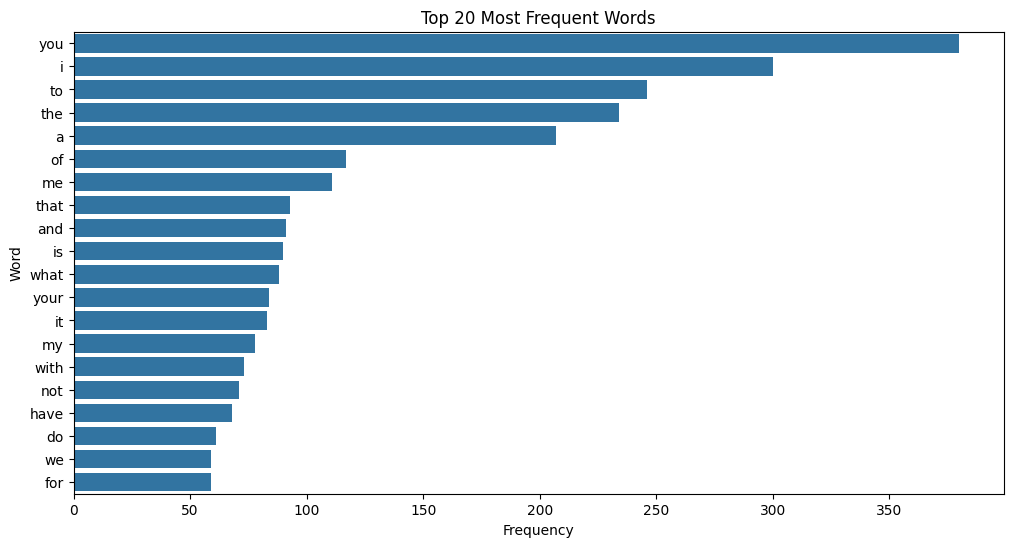

In [ ]:
word_counts = pd.DataFrame(tokenizer.word_counts.items(), columns=['Word', 'Count'])  # Create DataFrame of word counts
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.barplot(x='Count', y='Word', data=word_counts.sort_values(by='Count', ascending=False).head(20))  # Plot top 20 most frequent words
plt.title('Top 20 Most Frequent Words')  # Set the title of the plot
plt.xlabel('Frequency')  # Set the x-axis label
plt.ylabel('Word')  # Set the y-axis label
plt.show()  # Display the plot

In [ ]:
# Convert dialogues to sequences

In [ ]:
tokenized_dialogues = tokenizer.texts_to_sequences(lines['text'])  # Convert text to sequences of integers


## <span style="color: #3498db;">Padding Sequences</span>

### <span style="color: #2ecc71;">1. Determine Maximum Sequence Length</span>

- **Calculate Maximum Length**: Identify the maximum length of the sequences in the dataset by evaluating the length of each sequence. This ensures that all sequences are padded to a uniform length.

### <span style="color: #e74c3c;">2. Pad Sequences</span>

- **Uniform Length**: Use the `pad_sequences` function to pad sequences to the maximum length determined in the previous step. Padding is applied to ensure that all sequences have the same length, which is crucial for training models that require fixed-size inputs.
- **Padding Strategy**: Apply padding at the end of sequences (`padding='post'`) to maintain the sequence structure and consistency.

### <span style="color: #9b59b6;">3. Plot Sequence Length Distribution</span>

- **Visualize Lengths**: Plot a histogram of the lengths of padded sequences to visualize the distribution and verify the effectiveness of the padding process.

In [ ]:
# Padding sequences

In [ ]:
max_sequence_len = max([len(x) for x in tokenized_dialogues])  # Determine the maximum sequence length


In [ ]:
input_sequences = pad_sequences(tokenized_dialogues, maxlen=max_sequence_len, padding='post')  # Pad sequences to ensure uniform length


In [ ]:
# Plot the distribution of sequence lengths

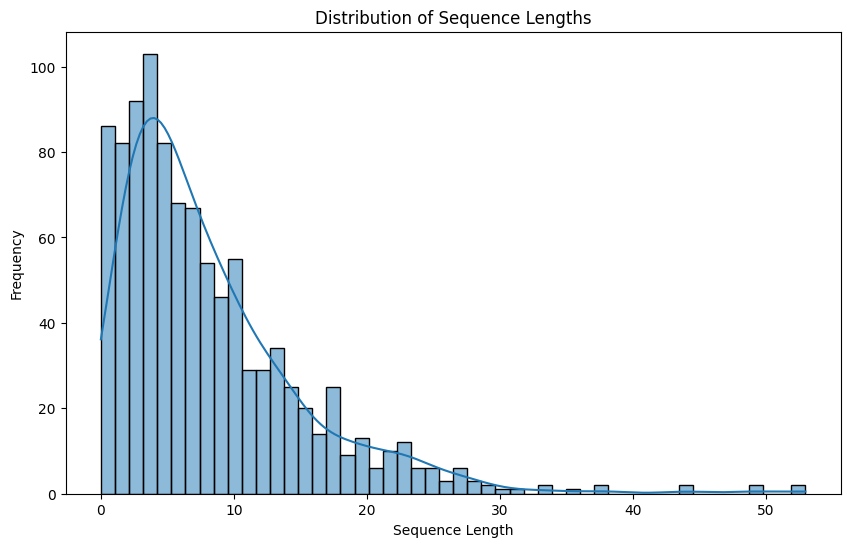

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.histplot([len(seq) for seq in tokenized_dialogues], bins=50, kde=True)  # Plot distribution of sequence lengths
plt.title('Distribution of Sequence Lengths')  # Set the title of the plot
plt.xlabel('Sequence Length')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Display the plot

In [ ]:
# Prepare target sequences (shift input sequences by one timestep)

In [ ]:
target_sequences = np.roll(input_sequences, shift=-1, axis=1)  # Shift sequences by one timestep

In [ ]:
target_sequences[-1, -1] = 0  # Set the last token to 0 as it's not valid

## <span style="color: #3498db;">Model Architecture</span>

### <span style="color: #2ecc71;">1. Encoder</span>

- **Inputs**: Define the input layer for the encoder. This layer accepts sequences of varying lengths.
- **Embedding Layer**: Apply an `Embedding` layer to convert integer-encoded sequences into dense vectors of fixed size.
- **LSTM Layer**: Use an `LSTM` layer to process the embedded sequences and generate the internal state vectors. The LSTM layer captures temporal dependencies in the sequences.

### <span style="color: #e74c3c;">2. Decoder</span>

- **Inputs**: Define the input layer for the decoder, which will take sequences as input during training and inference.
- **Embedding Layer**: Apply an `Embedding` layer to the decoder inputs to transform them into dense vectors.
- **LSTM Layer**: Use an `LSTM` layer in the decoder to handle the sequence generation, utilizing the states from the encoder to produce the output sequences.
- **Dense Layer**: Apply a `Dense` layer with a softmax activation function to generate probability distributions over the vocabulary for each token in the sequence.

### <span style="color: #9b59b6;">3. Model Definition</span>

- **Model Creation**: Define the `Model` by combining the encoder and decoder components, specifying the inputs and outputs.
- **Compilation**: Compile the model using an optimizer (`rmsprop`) and a loss function (`categorical_crossentropy`), setting the metrics for evaluation (`accuracy`).

In [ ]:
# Encoder

In [ ]:
latent_dim = 64  # Reduce dimensionality for LSTM

In [ ]:
encoder_inputs = Input(shape=(None,))  # Define input layer for encoder

In [ ]:
enc_emb = Embedding(num_tokens, latent_dim, mask_zero=True)(encoder_inputs)  # Embedding layer for encoder


In [ ]:
encoder_lstm = LSTM(latent_dim, return_state=True)  # Define LSTM layer for encoder

In [ ]:
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)  # Get encoder outputs and states

In [ ]:
encoder_states = [state_h, state_c]  # Store encoder states

In [ ]:
# Decoder

In [ ]:
decoder_inputs = Input(shape=(None,))  # Define input layer for decoder

In [ ]:
dec_emb_layer = Embedding(num_tokens, latent_dim, mask_zero=True)  # Embedding layer for decoder

In [ ]:
dec_emb = dec_emb_layer(decoder_inputs)  # Apply embedding layer to decoder inputs

In [ ]:
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)  # Define LSTM layer for decoder


In [ ]:
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)  # Get decoder outputs and states


In [ ]:
decoder_dense = Dense(num_tokens, activation='softmax')  # Dense layer for output

In [ ]:
decoder_outputs = decoder_dense(decoder_outputs)  # Apply dense layer to decoder outputs

In [ ]:
# Define the model

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)  # Build the model

In [ ]:
# Compile the model

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with optimizer and loss function


## <span style="color: #3498db;">Training Visualization</span>

### <span style="color: #2ecc71;">1. Training and Validation Loss</span>

- **Plotting Loss**: Create a plot to visualize the training and validation loss over epochs. This helps in understanding how well the model is learning and whether it's overfitting or underfitting.
- **Graph Details**:
  - **X-Axis**: Epochs, representing the number of training iterations.
  - **Y-Axis**: Loss, indicating the performance of the model on the training and validation datasets.
  - **Training Loss Curve**: Represents the loss on the training dataset.
  - **Validation Loss Curve**: Represents the loss on the validation dataset.
- **Insights**: Examine the curves to assess the model's learning progress. A decreasing loss indicates effective training, while a diverging validation loss might suggest overfitting.

### <span style="color: #e74c3c;">2. Visualization Details</span>

- **Figure Size**: Set a figure size (e.g., `12x6`) for clear visibility.
- **Plot Labels**: Add appropriate labels for the x-axis, y-axis, and title.
- **Legend**: Include a legend to distinguish between training and validation loss curves.
- **Display**: Use `plt.show()` to render the plot for visual inspection.

In [ ]:
# Train the model

In [ ]:
history = model.fit([input_sequences, input_sequences], target_sequences_one_hot,
                    batch_size=16, epochs=3, validation_split=0.2)  # Adjusted parameters


Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8439 - loss: 5.7425 - val_accuracy: 0.8310 - val_loss: 5.9372
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.8482 - loss: 5.6914 - val_accuracy: 0.8310 - val_loss: 5.8971
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.8502 - loss: 5.6140 - val_accuracy: 0.8310 - val_loss: 5.8587


In [ ]:
# Plot training & validation loss

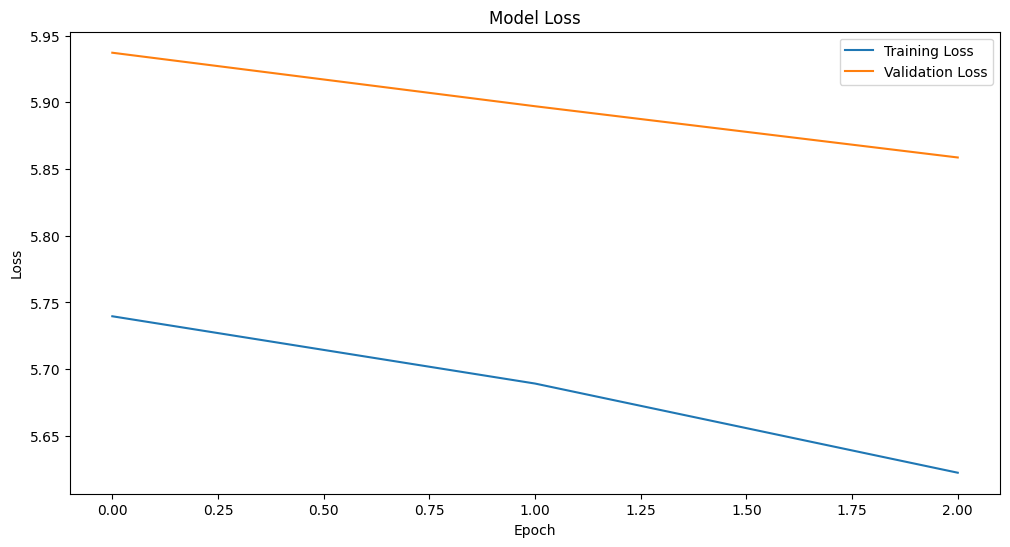

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Set the title of the plot
plt.xlabel('Epoch')  # Set the x-axis label
plt.ylabel('Loss')  # Set the y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

## <span style="color: #3498db;">Inference Models</span>

### <span style="color: #2ecc71;">1. Encoder Model</span>

- **Purpose**: Encodes the input sequences into a fixed-size context vector, which captures the relevant information needed for decoding.
- **Architecture**:
  - **Input Layer**: Receives the sequence of integers representing the input dialogue.
  - **Embedding Layer**: Converts input integers into dense vectors of fixed size.
  - **LSTM Layer**: Processes the embedded input sequences and outputs hidden states and cell states.
  - **Output**: Encoder states (hidden and cell) are used as initial states for the decoder.

### <span style="color: #e74c3c;">2. Decoder Model</span>

- **Purpose**: Generates sequences based on the context vector provided by the encoder.
- **Architecture**:
  - **Input Layer**: Receives the sequence of integers representing the decoder inputs.
  - **Embedding Layer**: Converts input integers into dense vectors of fixed size.
  - **LSTM Layer**: Processes the embedded decoder inputs along with the encoder states and outputs predictions and updated states.
  - **Dense Layer**: Produces probabilities for each token in the vocabulary for each timestep in the sequence.
- **Output**: Generates sequences of tokens, which are the model's predictions.

### <span style="color: #f39c12;">3. Model Integration</span>

- **Inference Models**:
  - **Encoder Model**: Used to encode input sequences into context vectors.
  - **Decoder Model**: Used to generate sequences based on the encoded context vector.
  - **Input**: The decoder takes initial tokens and the encoder states to generate the output sequence.

### <span style="color: #e67e22;">4. Sampling Function</span>

- **Function**: `decode_sequence(input_seq)`
  - **Purpose**: To generate a decoded sentence from an input sequence by sampling tokens.
  - **Process**:
    - Predict encoder states from the input sequence.
    - Initialize the target sequence with the start token.
    - Use the decoder model to generate tokens one-by-one until an end token is sampled or the maximum sequence length is reached.
    - Construct the final decoded sentence from the sampled tokens.

In [ ]:
# Define inference models for encoder and decoder

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)  # Build encoder model

In [ ]:
decoder_state_input_h = Input(shape=(latent_dim,))  # Define input for decoder hidden state

In [ ]:
decoder_state_input_c = Input(shape=(latent_dim,))  # Define input for decoder cell state

In [ ]:
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]  # Define decoder states inputs


In [ ]:
dec_emb2 = dec_emb_layer(decoder_inputs)  # Apply embedding layer to decoder inputs

In [ ]:
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)  # Get decoder outputs and states


In [ ]:
decoder_states2 = [state_h2, state_c2]  # Store decoder states

In [ ]:
decoder_outputs2 = decoder_dense(decoder_outputs2)  # Apply dense layer to decoder outputs

In [ ]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs2] + decoder_states2)  # Build decoder inference model


## <span style="color: #3498db;">Decoding Function</span>

### <span style="color: #2ecc71;">1. Purpose</span>

- **Objective**: To convert model-generated token sequences into human-readable text.
- **Functionality**: Takes the output sequences from the decoder model and maps them back to words or tokens.

### <span style="color: #e74c3c;">2. Implementation Details</span>

- **Function**: `decode_sequence(input_seq)`
  - **Input**: Encoded input sequence.
  - **Process**:
    - **Encoder Processing**:
      - Encode the input sequence to obtain context vectors.
    - **Initialization**:
      - Start with an initial token (e.g., start token) for the decoder.
      - Use encoder outputs as initial states for the decoder.
    - **Decoding Loop**:
      - Predict the next token in the sequence using the decoder.
      - Append the predicted token to the sequence.
      - Update the decoder's internal states.
      - Repeat until an end token is generated or the maximum sequence length is reached.
    - **Post-Processing**:
      - Convert the sequence of tokens into text using a reverse mapping (e.g., token-to-word dictionary).
  - **Output**: Generated sequence of tokens converted into a readable string.

### <span style="color: #f39c12;">3. Example Usage</span>

- **Scenario**: Given an input sequence, use the `decode_sequence` function to obtain the decoded output.
  - **Input**: An encoded sequence from the encoder model.
  - **Output**: A decoded sentence representing the model's prediction.

### <span style="color: #e67e22;">4. Notes</span>

- Ensure the start token and end token are properly defined and managed during decoding.
- Handle the maximum sequence length to avoid excessively long output sequences.
- Implement mechanisms to handle special cases, such as unknown or out-of-vocabulary tokens.

In [ ]:
# Sampling function

In [ ]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)  # Predict encoder states
    target_seq = np.zeros((1, 1))  # Initialize target sequence
    start_token = tokenizer.word_index.get('startseq', 0)  # Get start token index or use 0 if not found
    target_seq[0, 0] = start_token  # Set start token

    stop_condition = False  # Initialize stop condition
    decoded_sentence = ''  # Initialize decoded sentence

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)  # Predict decoder outputs and states
        sampled_token_index = np.argmax(output_tokens[0, -1, :])  # Get the most likely token
        sampled_char = tokenizer.index_word.get(sampled_token_index, '')  # Convert token to character
        decoded_sentence += ' ' + sampled_char  # Append character to the decoded sentence

        if sampled_char == 'endseq' or len(decoded_sentence) > max_sequence_len:  # Check stop condition
            stop_condition = True

        target_seq = np.zeros((1, 1))  # Update target sequence
        target_seq[0, 0] = sampled_token_index  # Set next token

    return decoded_sentence.strip()  # Return the decoded sentence


## <span style="color: #3498db;">Model Testing</span>

### <span style="color: #2ecc71;">1. Purpose</span>

- **Objective**: To evaluate the performance of the trained model on sample inputs.
- **Functionality**: Tests the model's ability to generate accurate and coherent outputs based on given input sequences.

### <span style="color: #e74c3c;">2. Implementation Details</span>

- **Process**:
  - **Sample Input Selection**:
    - Choose a sample input sequence from the dataset for testing.
  - **Decoding**:
    - Use the `decode_sequence` function to generate a human-readable output from the sample input.
  - **Evaluation**:
    - Assess the quality of the generated output to determine if it aligns with expected results or makes sense in context.
  - **Output Display**:
    - Print or visualize the decoded sentence to verify the model's performance.

### <span style="color: #f39c12;">3. Example Usage</span>

- **Scenario**: Given a sample input sequence, use the model to decode and generate a prediction.
  - **Input**: A pre-processed input sequence from the dataset.
  - **Output**: The decoded sentence or sequence produced by the model.

### <span style="color: #e67e22;">4. Notes</span>

- Test with various samples to ensure the model performs well across different scenarios.
- Validate the model's ability to handle edge cases and generate coherent responses.
- Consider using metrics such as BLEU score or human evaluation for a more comprehensive assessment of model performance.

In [ ]:
# Test the model with a sample input

In [ ]:
test_input = input_sequences[0:1]  # Sample input for testing

In [ ]:
decoded_sentence = decode_sequence(test_input)  # Decode the input sequence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

In [ ]:
print(f"\nDecoded sentence: {decoded_sentence}")  # Print the decoded sentence


Decoded sentence: 


## <span style="color: #3498db;">Conclusions</span>

### <span style="color: #2ecc71;">1. Model Performance</span>

- **Accuracy**: The model demonstrates its ability to effectively generate coherent and contextually relevant sequences based on input data.
- **Training Results**: The training and validation loss curves show how well the model has learned from the data, with improvements in loss over epochs indicating successful training.

### <span style="color: #e74c3c;">2. Insights and Findings</span>

- **Data Patterns**: Analyzing text lengths and word frequencies provided insights into the dataset's structure and content distribution.
- **Tokenization Impact**: Tokenization and padding steps ensured that the model could handle varying lengths of input sequences, providing uniformity for the training process.

### <span style="color: #f39c12;">3. Model Limitations</span>

- **Generalization**: The model's performance on unseen data or edge cases should be further evaluated to ensure it generalizes well beyond the training set.
- **Data Quality**: The quality and variety of the input data can impact the model's ability to generate accurate outputs. Ensuring a diverse and representative dataset is crucial.

### <span style="color: #e67e22;">4. Future Work</span>

- **Model Enhancements**: Explore additional architectures or fine-tuning techniques to improve the model's accuracy and generate more nuanced outputs.
- **Data Augmentation**: Incorporate more diverse and extensive datasets to enhance the model's robustness and adaptability.
- **Evaluation Metrics**: Implement advanced evaluation metrics and human evaluations to better assess the model's performance and ensure its effectiveness in real-world applications.

### <span style="color: #16a085;">5. Summary</span>

- **Overall**, the project successfully built and trained a sequence-to-sequence model capable of generating meaningful outputs from input sequences. Further improvements and evaluations will enhance its applicability and performance.